## importing Liabraries

In [1]:
import pandas as pd
import numpy as np

import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense,LeakyReLU,ReLU,ELU,PReLU,Dropout

import matplotlib.pyplot as plt
%matplotlib inline 
from keras.models import Sequential
from keras.layers import Dense,LeakyReLU,ReLU,ELU,PReLU,Dropout

## Loading Data

In [2]:
(X_train,y_train) , (X_test,y_test)=keras.datasets.mnist.load_data()

In [3]:
print("X_train-->",len(X_train))
print("-"* 100)
print("y_train-->",len(y_train))
print("-"* 100)
print("X_test-->",len(X_test))
print("-"* 100)
print("y_test-->",len(y_test))

X_train--> 60000
----------------------------------------------------------------------------------------------------
y_train--> 60000
----------------------------------------------------------------------------------------------------
X_test--> 10000
----------------------------------------------------------------------------------------------------
y_test--> 10000


In [4]:
# Shape of traing data
X_train.shape

(60000, 28, 28)

* here 28 , 28 means the mnsit data set represenation of one image in 28*28 pixel format,we have to flatten this matrix image into 1 d

In [5]:
X_train[0].shape

(28, 28)

In [6]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

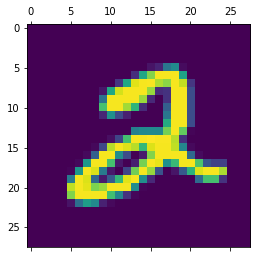

In [7]:
plt.matshow(X_train[5])

## These all are handwritten image

In [8]:
y_train.shape

(60000,)

In [9]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

## Note y_train have values between 0 to 9

# Step1- Scale the values
* as values are between 0 to 255 o means black and 255 mean white, if we divide the values with 255 all values will be between 0 and 1


In [10]:
# X_train=X_train/255
# y_train=y_train/255

### For me scaling is giving very low accuracy

# Step-2
* Flatten the input image i.2 28*28 into 1 d matrix

In [11]:
X_train_flatten=X_train.reshape(len(X_train),-1)
X_train_flatten.shape

(60000, 784)

In [12]:
X_test_flatten=X_test.reshape(len(X_test),-1)
X_test_flatten.shape

(10000, 784)

In [13]:
len(X_train)

60000

In [14]:
X_train_flatten[1]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  51, 159, 253,
       159,  50,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  48, 238,
       252, 252, 252, 237,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   

# Creating simple neural network

* Sequential- stack of layers in neural network
* dense- cross connections with all neurons
* 10- output neuron
* 784- input neuron
* sparse_categorical_crossentropy- It means our output class is categorial as we have ctaegories from 0-9 and sparse means our output category is an integer num, if its one hot encoded array we can use cross entropy loss 

In [15]:
# Initialising the model
classifier = Sequential()

In [16]:
# Adding first hidden layer
classifier.add(Dense(units=100,kernel_initializer ="he_uniform",activation="relu",input_dim=784))

# Adding Second hidden layer
classifier.add(Dense(units=100,kernel_initializer ="he_uniform",activation="relu"))

# Adding Output layer
classifier.add(Dense(units=10,kernel_initializer ="glorot_uniform",activation="softmax"))

# Compile the model
classifier.compile(optimizer="adam", loss="sparse_categorical_crossentropy",metrics=["accuracy"])

## fit the model

In [17]:
model=classifier.fit(X_train_flatten,y_train, validation_split=0.33,batch_size=10,epochs=5)

Epoch 1/5
4020/4020 [==============================] - 18s 4ms/step - loss: 2.5226 - accuracy: 0.8325 - val_loss: 0.7087 - val_accuracy: 0.8602
Epoch 2/5
4020/4020 [==============================] - 17s 4ms/step - loss: 0.5533 - accuracy: 0.8761 - val_loss: 0.5008 - val_accuracy: 0.8827
Epoch 3/5
4020/4020 [==============================] - 17s 4ms/step - loss: 0.3884 - accuracy: 0.9075 - val_loss: 0.3969 - val_accuracy: 0.9084
Epoch 4/5
4020/4020 [==============================] - 17s 4ms/step - loss: 0.2709 - accuracy: 0.9307 - val_loss: 0.2729 - val_accuracy: 0.9278
Epoch 5/5
4020/4020 [==============================] - 17s 4ms/step - loss: 0.2278 - accuracy: 0.9393 - val_loss: 0.2923 - val_accuracy: 0.9384


# Model evaluation test dataset

In [18]:
classifier.evaluate(X_test_flatten,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.2702 - accuracy: 0.9427


[0.2701713442802429, 0.9427000284194946]

# Prediction

In [19]:
y_pred=classifier.predict(X_test_flatten)
y_pred[0]

array([4.5832726e-12, 1.5362813e-09, 3.4941820e-07, 2.4376614e-06,
       3.5271009e-06, 9.0409245e-08, 5.3391547e-13, 9.9938643e-01,
       1.6627782e-08, 6.0709572e-04], dtype=float32)

In [20]:
np.argmax(y_pred[5])

1

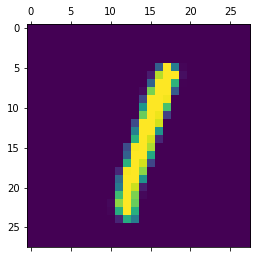

In [21]:
plt.matshow(X_test[5])

**since np.argmax(y_pred[5]) and X_test[5] correctcly predicted the label as 1**

In [22]:
# lets see how many of them matches
y_pred_data=[np.argmax(i) for i in y_pred]
y_pred_data[:10]

[7, 2, 1, 0, 4, 1, 4, 9, 6, 9]

In [23]:
y_test[:10]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9], dtype=uint8)

In [24]:
y_test.shape

(10000,)

In [25]:
type(y_pred_data)

list

In [26]:
## confusion matrix
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_pred_data)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 953,    0,    4,    2,    2,    5,    4,    1,    5,    4],
       [   0, 1117,    8,    2,    1,    1,    1,    1,    3,    1],
       [   3,    3,  977,    8,    7,    1,    5,   16,   11,    1],
       [   0,    5,   18,  939,    1,   20,    0,    8,   16,    3],
       [   1,    1,    7,    0,  952,    0,    3,    1,    5,   12],
       [   3,    0,    3,   45,    2,  801,   10,    3,   18,    7],
       [   6,    3,   11,    1,   10,   10,  905,    0,   12,    0],
       [   1,    5,   19,    6,    8,    0,    0,  975,    0,   14],
       [   5,    1,    9,   20,   11,   10,    5,    4,  895,   14],
       [   4,   10,    0,    7,   45,    5,    0,   10,   15,  913]])>

#### since this confusion matrix is ghard to read we can plot a heatmap to see it clearly

Text(69.0, 0.5, 'Truth')

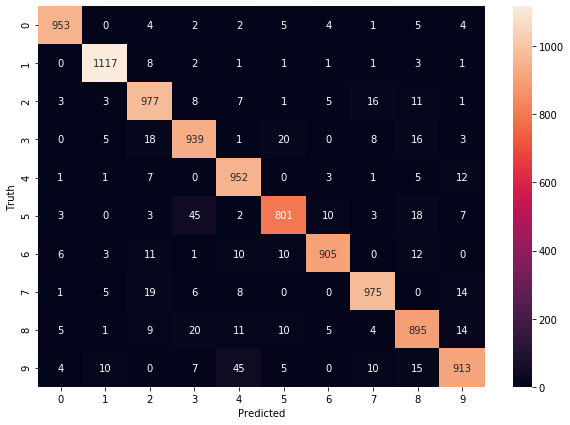

In [27]:
import seaborn as sns
plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True,fmt="d")
plt.xlabel("Predicted")
plt.ylabel('Truth')

* Here 1130 times label 1 predicted true by our model also, 2 time model is predicted 0 ,2 times it is predicted 2 and so on

# Adding the Dropout layer

In [28]:
classifier=Sequential()

In [29]:
# Adding first hidden layer
classifier.add(Dense(units=100,kernel_initializer ="he_uniform",activation="relu",input_dim=784))
classifier.add(Dropout(0.1))
#dropping out 30% neurons in a layer in Keras 

# Adding Second hidden layer
classifier.add(Dense(units=100,kernel_initializer ="he_uniform",activation="relu"))
classifier.add(Dropout(0.1))

# Adding Output layer
classifier.add(Dense(units=10,kernel_initializer ="glorot_uniform",activation="softmax"))
classifier.add(Dropout(0.1))

# Compile the model
classifier.compile(optimizer="adam", loss="sparse_categorical_crossentropy",metrics=["accuracy"])

In [30]:
model=classifier.fit(X_train_flatten,y_train, validation_split=0.33,batch_size=10,epochs=4)

Epoch 1/4
4020/4020 [==============================] - 20s 5ms/step - loss: 12.0510 - accuracy: 0.1740 - val_loss: 13.8484 - val_accuracy: 0.1405
Epoch 2/4
4020/4020 [==============================] - 19s 5ms/step - loss: 12.2393 - accuracy: 0.1626 - val_loss: 13.2731 - val_accuracy: 0.1765
Epoch 3/4
4020/4020 [==============================] - 19s 5ms/step - loss: 12.4576 - accuracy: 0.1515 - val_loss: 12.1481 - val_accuracy: 0.2459
Epoch 4/4
4020/4020 [==============================] - 19s 5ms/step - loss: 11.3909 - accuracy: 0.2160 - val_loss: 12.7796 - val_accuracy: 0.2071


In [31]:
classifier.evaluate(X_test_flatten,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 12.7491 - accuracy: 0.2090


[12.749098777770996, 0.20900000631809235]

In [32]:
# prediction
y_pred=classifier.predict(X_test_flatten)
y_pred_data=[np.argmax(i) for i in y_pred]

In [33]:
## confusion matrix
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_pred_data)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[954,   0,   0,   0,   0,   0,  26,   0,   0,   0],
       [438,   0,   0,   0,   0,   0, 697,   0,   0,   0],
       [328,   0,   0,   0,   0,   0, 704,   0,   0,   0],
       [794,   0,   0,   0,   0,   0, 216,   0,   0,   0],
       [ 33,   0,   0,   0, 262,   0, 687,   0,   0,   0],
       [768,   0,   0,   0,   2,   0, 122,   0,   0,   0],
       [ 84,   0,   0,   0,   0,   0, 874,   0,   0,   0],
       [209,   0,   0,   0,  12,   0, 807,   0,   0,   0],
       [614,   0,   0,   0,   1,   0, 359,   0,   0,   0],
       [123,   0,   0,   0,  16,   0, 870,   0,   0,   0]])>

Text(69.0, 0.5, 'Truth')

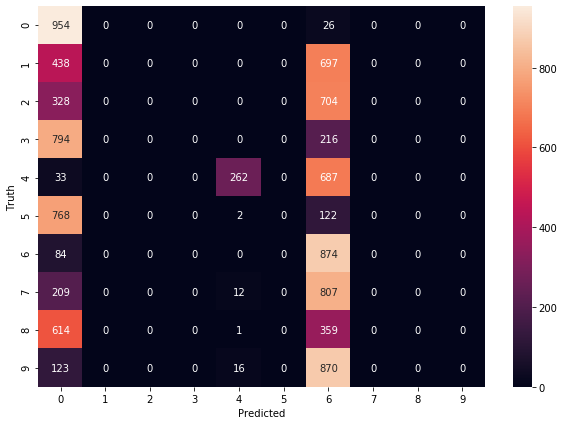

In [34]:
import seaborn as sns
plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True,fmt="d")
plt.xlabel("Predicted")
plt.ylabel('Truth')

# Using flatten layer instead of doing reshape to flat 28*28 layer into 784

In [35]:
from keras.layers import Flatten

In [36]:
classifier=Sequential()

In [37]:
# Adding first hidden layer
classifier.add(Flatten(input_shape=(28,28)))

classifier.add(Dense(units=100,kernel_initializer ="he_uniform",activation="relu"))
#dropping out 30% neurons in a layer in Keras 

# Adding Second hidden layer
classifier.add(Dense(units=100,kernel_initializer ="he_uniform",activation="relu"))

# Adding Output layer
classifier.add(Dense(units=10,kernel_initializer ="glorot_uniform",activation="softmax"))

# Compile the model
classifier.compile(optimizer="adam", loss="sparse_categorical_crossentropy",metrics=["accuracy"])

In [38]:
model=classifier.fit(X_train,y_train, validation_split=0.33,batch_size=10,epochs=2)

Epoch 1/2
4020/4020 [==============================] - 18s 4ms/step - loss: 2.4871 - accuracy: 0.8345 - val_loss: 0.5825 - val_accuracy: 0.8641
Epoch 2/2
4020/4020 [==============================] - 18s 4ms/step - loss: 0.5312 - accuracy: 0.8918 - val_loss: 0.4048 - val_accuracy: 0.9090
